In [1]:
import numpy as np
import pandas as pd
import warnings #This is so we can see all cols of a dataset in a terminal
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None) #From this point on, all cols will be visible in the terminal
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
#This function looks at some general characteristics of the data as well as the first five rows of data
def data_peek_fn(wine_dataset):
    return wine_dataset.info(),wine_dataset.shape,wine_dataset.head()

#After the first look at the data, I want to see how many blanks there are within my data
#This function enumerates nulls and counts them
def null_checker_fn(wine_dataset):
    return wine_dataset.isna().any(), wine_dataset.isna().sum()

#That is a lot of nulls in my dataset. Let's clean that up with the next function and look at the data again
def basic_data_clean_fn(wine_dataset):
    reshaped_wine_dataset = wine_dataset.dropna()
    return reshaped_wine_dataset.info(), reshaped_wine_dataset.shape, reshaped_wine_dataset.head()
print(basic_data_clean_fn(wine_dataset))
#Let's look at some summary stats for points and price
#Remember if your col names are upper or lowercase (wine data cols are lowercase)
def summary_stats(wine_dataset):
    reshaped_wine_dataset = wine_dataset.dropna()
    wine_points = wine_dataset['points']
    wine_price = wine_dataset['price']
    print("Summary stats of the wine points:", wine_points.describe())
    print("Summary stats of the wine prices:", wine_price.describe())
print(summary_stats(wine_dataset))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54170 entries, 3 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      54170 non-null  object 
 1   designation  54170 non-null  object 
 2   points       54170 non-null  int64  
 3   price        54170 non-null  float64
 4   province     54170 non-null  object 
 5   region_1     54170 non-null  object 
 6   taster_name  54170 non-null  object 
 7   title        54170 non-null  object 
 8   variety      54170 non-null  object 
 9   winery       54170 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.5+ MB
(None, (54170, 10),   country                         designation  points  price  \
3      US                Reserve Late Harvest      87   13.0   
4      US  Vintner's Reserve Wild Child Block      87   65.0   
5   Spain                        Ars In Vitro      87   15.0   
6   Italy                             Belsito   

In [4]:
# Looking at the most frequently reviewed wine.
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)  # Remember to import all of this for new cells

wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
wineCritFreq = wine_dataset[["taster_name","variety"]]
wineNames  = wine_dataset["variety"]
wineVarietyCount = wineCritFreq.groupby("variety").count()
wineVarietyCountSorted = wineVarietyCount.sort_values("taster_name",ascending = False)
wineVariety1000 = wineVarietyCountSorted[wineVarietyCountSorted["taster_name"] > 1000]
# Sum all the values in the taster name column. Use this to make a relative pie chart for the top 5 wines.
# print(wineVariety1000["taster_name"].sum())  # There are 82,017 reviews of the top 1000 wines
wineVariety1000["Relative Percent"] = (wineVariety1000["taster_name"] / 82017) * 100
print(wineVariety1000) # Shows how many reviews and their relative perccentage

                            taster_name  Relative Percent
variety                                                  
Pinot Noir                        10319         12.581538
Chardonnay                         8943         10.903837
Red Blend                          7109          8.667715
Bordeaux-style Red Blend           6390          7.791068
Cabernet Sauvignon                 6271          7.645976
Riesling                           4935          6.017045
Sauvignon Blanc                    4020          4.901423
RosÃ©                              3315          4.041845
Syrah                              3140          3.828475
Malbec                             2583          3.149347
Portuguese Red                     2466          3.006694
Merlot                             2099          2.559226
Sangiovese                         1997          2.434861
Nebbiolo                           1981          2.415353
White Blend                        1778          2.167843
Tempranillo   

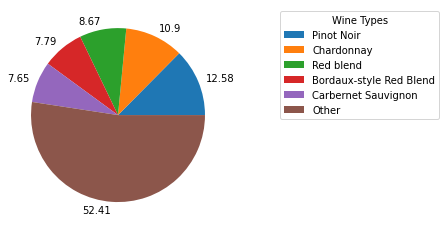

In [16]:
# Pie chart for the top 10 wines. The remianing wines will be in the other category
# Due to how the results are agreggated, I have to make the pie chart another way
# I rounded to two decimal places to make the math easier
import matplotlib.pyplot as plt
otherPercent = 100 - (12.58 + 10.9 + 8.67 + 7.79 + 7.65)
otherPerRounded = 52.41
wines = ['Pinot Noir', 'Chardonnay', 'Red blend', 'Bordaux-style Red Blend', 'Carbernet Sauvignon','Other']
percents = [12.58, 10.9, 8.67, 7.79, 7.65, otherPerRounded]
plt.pie(percents, labels = percents)
plt.legend(wines, title = 'Wine Types',bbox_to_anchor = (2,1),  loc = 'upper right')
# The bbox_to_anchor  = (x,y) allowed me to get the legend off the chart itself
plt.show()

Here, it is easier to see that the top five wines constitute for almost half of wine reviews totaled. Within the top five wines, pinot noir and chardonnay are the two most prominent slices. The next step in this analysis, would be to look at pricing and points to see if they have an influence on what wines are reviewed the most.
Summary stats for wine pricing: 
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Summary stats for wine points (rating):
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
In the cell below, I will construct two bell curves to better visualize the data

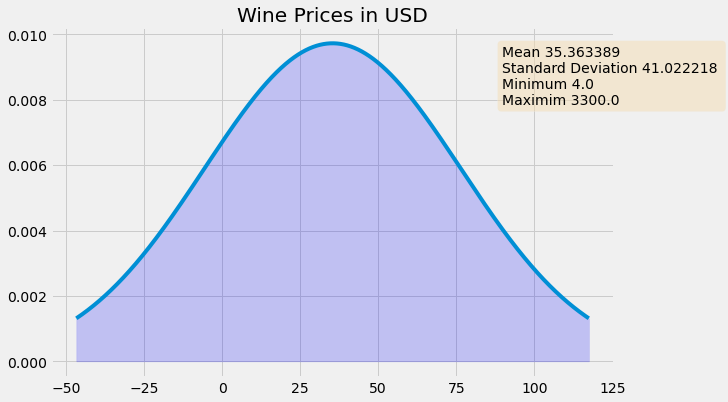

In [25]:
# Wine pricing Bell Curve
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Initialize values
mean = 35.363389
std = 41.022218
minprice = 4.0
maxprice = 3300.0
upperBound = mean + (2 * std)
lowerBound = mean - (2 * std)

# Define x-values
# np.arange(lowestValue, largestValue, increment between points)
x = np.arange(lowerBound,upperBound,0.01)  

# Define y-values 
# normal probability distribution takes the arguments x-values, mean, and standard deviation
y = norm.pdf(x,mean,std)

# Define the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

# Descriptive textbox
textstr = f'Mean {mean}  \nStandard Deviation {std} \nMinimum {minprice} \nMaximim {maxprice}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Fill the plot with color
x_fill = np.arange(lowerBound, upperBound, 0.001)
y_fill = norm.pdf(x_fill, mean, std)
ax.fill_between(x_fill,y_fill,0, alpha=0.2, color='blue')


# Define the characteristics of the plot
plt.title("Wine Prices in USD")
plt.style.use('fivethirtyeight')
plt.show()

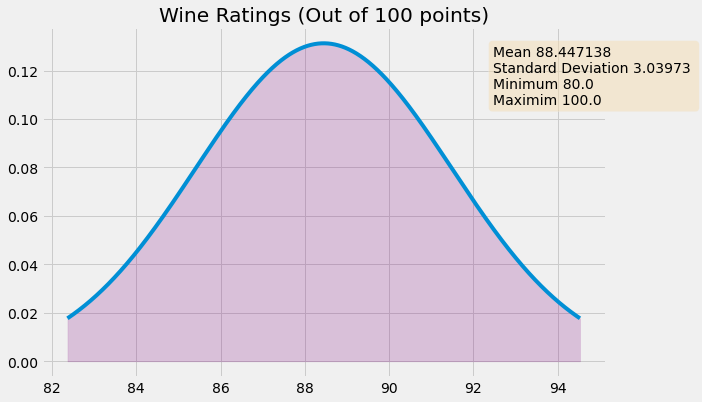

In [28]:
# Wine rating Bell Curve
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Initialize values
mean = 88.447138
std = 3.039730
minpoint = 80.0
maxpoint = 100.0
upperBound = mean + (2 * std)
lowerBound = mean - (2 * std)

# Define x-values
# np.arange(lowestValue, largestValue, increment between points)
x = np.arange(lowerBound,upperBound,.001)  

# Define y-values 
# normal probability distribution takes the arguments x-values, mean, and standard deviation
y = norm.pdf(x,mean,std)

# Define the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

# Descriptive textbox
textstr = f'Mean {mean}  \nStandard Deviation {std} \nMinimum {minpoint} \nMaximim {maxpoint}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Fill the plot with color
x_fill = np.arange(lowerBound, upperBound, 0.001)
y_fill = norm.pdf(x_fill, mean, std)
ax.fill_between(x_fill,y_fill,0, alpha=0.2, color='purple')


# Define the characteristics of the plot
plt.title("Wine Ratings (Out of 100 points)")
plt.style.use('fivethirtyeight')
plt.show()